<a href="https://colab.research.google.com/github/danilommarano/ML-S-plus/blob/master/notebook/NN_tabale_splus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd 
import numpy as np
import keras
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/Schwarzam/NN-SPLUS/master/zoo2.csv')

In [83]:
targetMergers = df[df['P_merg']>0.95]
targetSpiral = df[(df['simple_class'] == 'S') & (df['P_bulge']<0.99) & (df['P_merg']<0.95) & (df['P_S0']<0.99)]
targetElliptical = df[(df['P_bulge']>0.99) & (df['P_disk']<0.93) & (df['P_merg']<0.95) & (df['P_S0']<0.93)]
targetLenticular = df[(df['P_S0']>0.99) & (df['P_bulge']<0.9) & (df['P_merg']<0.95) & (df['P_disk']<0.9)]

Creating new collumn with Class 



```
0 for Ellip 
1 for Lenticullar
2 for Merger
3 for Spiral
```



In [84]:
import warnings
warnings.filterwarnings('ignore')

for x in targetElliptical:
  targetElliptical['Class'] = 0
for x in targetLenticular:
  targetLenticular['Class'] = 1
for x in targetMergers:
  targetMergers['Class'] = 2
for x in targetSpiral:
  targetSpiral['Class'] = 3

In [85]:
new_df = pd.concat((targetElliptical, targetLenticular, targetMergers, targetSpiral), axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [86]:
escolha = ['ISOarea',
 's2nDet',
 'PhotoFlag',
 'FWHM',
 'FWHM_n',
 'MUMAX',
 'A',
 'B',
 'THETA',
 'FlRadDet',
 'KrRadDet',
 'nDet_auto',
 'nDet_petro',
 'nDet_aper',
 'uJAVA_auto',
 'euJAVA_auto',
 's2n_uJAVA_auto',
 'uJAVA_petro',
 'euJAVA_petro',
 's2n_uJAVA_petro',
 'uJAVA_aper',
 'euJAVA_aper',
 's2n_uJAVA_aper',
 'F378_auto',
 'eF378_auto',
 's2n_F378_auto',
 'F378_petro',
 'eF378_petro',
 's2n_F378_petro',
 'F378_aper',
 'eF378_aper',
 's2n_F378_aper',
 'F395_auto',
 'eF395_auto',
 's2n_F395_auto',
 'F395_petro',
 'eF395_petro',
 's2n_F395_petro',
 'F395_aper',
 'eF395_aper',
 's2n_F395_aper',
 'F410_auto',
 'eF410_auto',
 's2n_F410_auto',
 'F410_petro',
 'eF410_petro',
 's2n_F410_petro',
 'F410_aper',
 'eF410_aper',
 's2n_F410_aper',
 'F430_auto',
 'eF430_auto',
 's2n_F430_auto',
 'F430_petro',
 'eF430_petro',
 's2n_F430_petro',
 'F430_aper',
 'eF430_aper',
 's2n_F430_aper',
 'g_auto',
 'eg_auto',
 's2n_g_auto',
 'g_petro',
 'eg_petro',
 's2n_g_petro',
 'g_aper',
 'eg_aper',
 's2n_g_aper',
 'F515_auto',
 'eF515_auto',
 's2n_F515_auto',
 'F515_petro',
 'eF515_petro',
 's2n_F515_petro',
 'F515_aper',
 'eF515_aper',
 's2n_F515_aper',
 'r_auto',
 'r_petro',
 'er_auto',
 's2n_r_auto',
 'er_petro',
 's2n_r_petro',
 'r_aper',
 'er_aper',
 's2n_r_aper',
 'F660_auto',
 'eF660_auto',
 's2n_F660_auto',
 'F660_petro',
 'eF660_petro',
 's2n_F660_petro',
 'F660_aper',
 'eF660_aper',
 's2n_F660_aper',
 'i_auto',
 'ei_auto',
 's2n_i_auto',
 'i_petro',
 'ei_petro',
 's2n_i_petro',
 'i_aper',
 'ei_aper',
 's2n_i_aper',
 'F861_auto',
 'eF861_auto',
 's2n_F861_auto',
 'F861_petro',
 'eF861_petro',
 's2n_F861_petro',
 'F861_aper',
 'eF861_aper',
 's2n_F861_aper',
 'z_auto',
 'ez_auto',
 's2n_z_auto',
 'z_petro',
 'ez_petro',
 's2n_z_petro',
 'z_aper',
 'ez_aper',
 's2n_z_aper',
 'zb',
 'zb_Min',
 'zb_Max',
 'Tb',
 'Odds',
 'Chi2',
 'M_B',
 'Stell_Mass',
 'CLASS',
 'PROB_GAL',
 'PROB_STAR',
 'RA_WISE',
 'Dec_WISE',
 'w1mpro',
 'w1sigmpro',
 'w1snr',
 'w1sat',
 'w2mpro',
 'w2sigmpro',
 'w2snr',
 'w2sat',
 'ext_flg',
 'cc_flags',
 'var_flg',
 'ph_qual',
 'Class']

In [87]:
df = new_df[escolha]
df = df.dropna()

In [88]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class         1.000000
Tb            0.270458
MUMAX         0.221519
w2sigmpro     0.208347
eF861_aper    0.199855
                ...   
w1snr        -0.205928
KrRadDet     -0.206786
zb           -0.215038
zb_Min       -0.266708
Stell_Mass   -0.275212
Name: Class, Length: 145, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35544b1c88>,
      dtype=object)

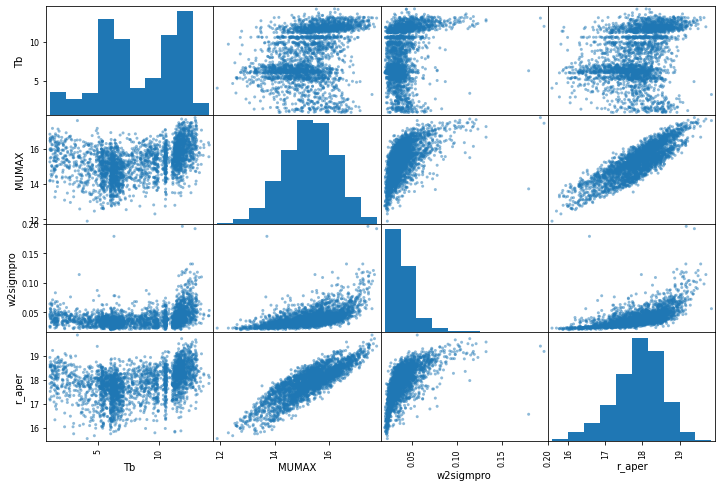

In [89]:
from pandas.plotting import scatter_matrix

attributes = ['Tb', 'MUMAX', 'w2sigmpro', 'r_aper']
scatter_matrix(df[attributes], figsize=(12,8))

In [90]:
df['Tb_per_MUMAX'] = df['MUMAX']/df['Tb']
df['r_aper_per_MUMAX'] = df['r_aper']/df['MUMAX']
df['r_aper_per_Tb'] = df['r_aper']/df['Tb']

In [95]:
corr_matrix = df.corr()
fSet = list(corr_matrix['Class'].sort_values(ascending=False)[0:50].index)
dfSet = df[fSet]

dfSet = dfSet.sample(frac=1).reset_index(drop=True)

In [105]:
num_classes = 4
labels = keras.utils.to_categorical(dfSet['Class'], num_classes)
del dfSet['Class']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dfSet, labels, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.30, random_state=42)

In [114]:
print('X de treino:', len(X_train))
print('y de treino:', len(y_train))

print('X de test:', len(X_test))
print('y de test:', len(y_test))

print('X de validacao:', len(X_val))
print('y de validacao:', len(y_val))

X de treino: 2011
y de treino: 2011
X de test: 603
y de test: 603
X de validacao: 259
y de validacao: 259
